<a href="https://colab.research.google.com/github/ialoko/televisionAI/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Empirical Study of TV Shows on Netflix

CSI4106 Project 1 Group 22



>Iyiola Aloko



>Emily Bonneville






---



#Perform a classification empirical study

###**1. Understanding the classification task for the dataset**

a. This classification empirical study will use the "Netflix Disney+ Prime Video Hulu Shows Collection" dataset from Kaggle. It originally is a multi-class but we will only select one class which makes this study a binary classification

b. The goal is to analyze information about TV shows and predict wether or not they are streaming on Netflix. The reason we chose this dataset is we did not want one that was very black-and-white but also not one that would have data that is too complicated since we only want to cover the basics of machine learning. We concluded that this dataset works well for this study because it is between those two extremes. The result assumptions of each TV show is something that even humans cannot know 100% if it is on Netflix or not.

---








###**2. Analyzing the dataset**

*   Number of features: 6 (only analyzing 4)
*   Missing data: a few missing for "Age" (40% of examples) and "IMDB Rating" (18% of examples) 
*   Number of training examples: 5368
*   Number of classes: 4 (only using 1)

---











###**3. Feature engineering**

All the necessary features are present. However, the 'ID' feature and 'Type' feature (value of 1 if is a TV show) seem useless in analyzing the dataset so these will not be considered in the study. As mentioned, we will only evaluate the data for the class 'Netflix', therefore the other classes will be removed.

---



###**4. Encoding the features**

All of the features are discrete. The only data transformation that needs to be done is discretization bin-making for 'Rotten Tomatoes', 'IMDb' and 'Year'. For example, the values of 'Rotten Tomatoes' are originally strings from '0/100' to '100/100' but they will be converted to integer values representing 4 different bins (using integers allows the system to use discrete values).

---



Importing the necessary modules:

In [ ]:
import numpy as np # linear algebra
from numpy import mean
from numpy import std
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import clear_output
from google.colab import files

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate  #used for cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# evaluate a logistic regression model
from sklearn.linear_model import LogisticRegression

#import Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Import Multilayer perceptron
from sklearn.neural_network import MLPClassifier

#Import for Precision/recall measures
from sklearn.metrics import precision_recall_fscore_support


Importing datasets

In [ ]:
from scipy.sparse import data

# Importing Data
#dataset = pd.read_csv('tv_shows.csv')
dataset = pd.read_csv('https://raw.githubusercontent.com/ebonn088/CSI4106-Project1/main/tv_shows.csv')
# The id column is not relevant
dataset.drop(columns=['Unnamed: 0'],inplace=True)
dataset.drop(columns=['ID'],inplace=True)
# The 'type' column is not relevant, as we already know the sets are all tv shows
dataset.drop(columns=['Type'],inplace=True)

#figure out the unique Age categories of  so we can encode them with numerical values
print(dataset['Age'].unique())
dataset['Age'] = dataset['Age'].replace(
    ['18+', '16+', 'all','7+', '13+'],
    [18, 16, 0, 7, 13])

#Encode Imdb categories as numerical values
dataset['IMDb'] = dataset['IMDb'].str.slice(0,3).astype(float) #converts strings like '9.5/10' to a value 9.5
dataset['IMDb'] = np.digitize(dataset['IMDb'], [3,5,7,8])
print(dataset['IMDb'].unique())

#Encode Imdb categories as numerical values
dataset['Rotten Tomatoes'] = dataset['Rotten Tomatoes'].str.slice(0,-4).astype(float) #converts strings like '95/100' to a value 95
dataset['Rotten Tomatoes'] = np.digitize(dataset['Rotten Tomatoes'], [30,50,70])
print(dataset['Rotten Tomatoes'].unique())

#Encode Year category as numerical values
dataset['Year'] = np.digitize(dataset['Year'], [1960,1980,2000,2005,2009])
print(dataset['Year'].unique())


['18+' '16+' '7+' 'all' nan '13+']
[4 3 2 1 0]
[3 2 1 0]
[4 5 3 2 1 0]


Skew Age and IMDb so best to replace with mode or median

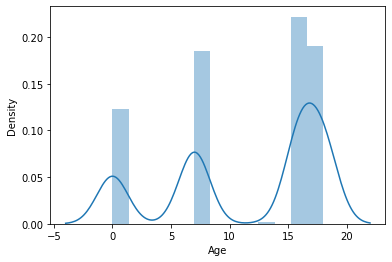

In [ ]:
sns.distplot(dataset['Age'])
clear_output()  # clears console output

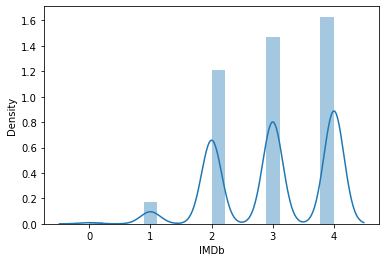

In [ ]:
sns.distplot(dataset['IMDb'])
clear_output()  # clears console output

In [ ]:
# Inputing the missing values to avoid NaN loss later on
#dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mode().iloc[0])
dataset['Age'] = dataset['Age'].fillna(1)
dataset['IMDb'] = dataset['IMDb'].fillna(dataset['IMDb'].mode().iloc[0])
dataset[1:21] #first 20 rows 

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
1,Stranger Things,5,16.0,4,3,1,0,0,0
2,Attack on Titan,5,18.0,4,3,1,1,0,0
3,Better Call Saul,5,18.0,4,3,1,0,0,0
4,Dark,5,16.0,4,3,1,0,0,0
5,Avatar: The Last Airbender,4,7.0,4,3,1,0,1,0
6,Peaky Blinders,5,18.0,4,3,1,0,0,0
7,The Walking Dead,5,18.0,4,3,1,0,0,0
8,Black Mirror,5,18.0,4,3,1,0,0,0
9,The Queen's Gambit,5,18.0,4,3,1,0,0,0
10,Mindhunter,5,18.0,4,3,1,0,0,0


Table 1



---


###**5. Preparing the dataset for the experiment, using Cross-validation**

The goal of cross-validation is to let us know which part of the training data we should use in order to get the highest accuracy when testing.

We will be using K-Folds cross validation. 

We will split the dataset into 5 folds. Each fold is then used once as a validation while the k - 1 (4) remaining folds form the training set.

In [ ]:
# prepare the cross-validation procedure
# X should be features
#y should be classes
#X = dataset[['Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Hulu', 'Prime Video', 'Disney+']]
X = dataset[['Year', 'Age', 'IMDb', 'Rotten Tomatoes']]
y = dataset[['Netflix']]

kf = KFold(n_splits=5) #selection 5 folds
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1074 1075 1076 ... 5365 5366 5367] TEST: [   0    1    2 ... 1071 1072 1073]
TRAIN: [   0    1    2 ... 5365 5366 5367] TEST: [1074 1075 1076 ... 2145 2146 2147]
TRAIN: [   0    1    2 ... 5365 5366 5367] TEST: [2148 2149 2150 ... 3219 3220 3221]
TRAIN: [   0    1    2 ... 5365 5366 5367] TEST: [3222 3223 3224 ... 4292 4293 4294]
TRAIN: [   0    1    2 ... 4292 4293 4294] TEST: [4295 4296 4297 ... 5365 5366 5367]


Above, we have the indices used to split X and y into the train and test sets using 5-fold cross validation. 


---
### **6 (& 7). Training the model using Default Parameters, testing it and reporting the accuracy of the model**


To simplify our task, we will be using cross_val_score and cross_val_predict from the sklearn library to train, test and evaluate our models using the split in step 5.

These two functions automatically split X and y into train and test sets and fits the model according to these splits.

**Logistic Regression:**

In [ ]:
# create model
logisticRegModel = LogisticRegression(max_iter=500) #multi_class='multinomial', solver='lbfgs',

#Generate cross-validated estimates for each input data point.
logisticReg_predictions1 = cross_val_predict(logisticRegModel, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model for each cross-validation fold
logisticRegScores = cross_val_score(logisticRegModel, X, y.values.ravel(), cv=5)

# report performance
print(f"The scores of the 5 folds: {logisticRegScores}")
print('Accuracy: %.3f' % mean(logisticRegScores))

The scores of the 5 folds: [0.56703911 0.48510242 0.66852886 0.63280522 0.56570363]
Accuracy: 0.584


With the result in the output above, we note that the third fold has the highest accuracy. This means that the training is most accurate when we use the third section as the testing and the rest for the training data.


**Naive Bayes:**

In [ ]:
NB_model = GaussianNB()

#Generate cross-validated estimates for each input data point.
NB_predictions1 = cross_val_predict(NB_model, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model
NB_scores = cross_val_score(NB_model, X, y.values.ravel(), cv=5)
# report performance
print(f"The scores of the 5 folds: {NB_scores}")
print('Accuracy: %.3f' % mean(NB_scores))

The scores of the 5 folds: [0.51210428 0.52141527 0.68808194 0.7110904  0.57875116]
Accuracy: 0.602


With the result in the output above, we note that the fourth fold has the highest accuracy.

**Multi-Layer Perceptron:**

In [ ]:
MLP_model = MLPClassifier(solver='adam', alpha=1e-5, random_state=1) #solver='sgd', alpha=1e-5,hidden_layer_sizes=(100,2),random_state=1

#Generate cross-validated estimates for each input data point.
MLP_predictions1 = cross_val_predict(MLP_model, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model
MLP_scores = cross_val_score(MLP_model, X, y.values.ravel(), cv=5)

# report performance
print(f"The scores of the 5 folds: {MLP_scores}")
print('Accuracy: %.3f' % mean(MLP_scores))

The scores of the 5 folds: [0.5018622  0.45251397 0.65642458 0.62348555 0.59273066]
Accuracy: 0.565


With the result in the output above, we note that the third fold has the highest accuracy. Therefore, we conclude that this fold is the best.

---
### **8. Performing an evaluation with precision/recall measures**

We will evaluate our models performance making predictions of y in comparison to the actual values of y


In [ ]:
#labels = [0, 1]
labels=np.unique(NB_predictions1)
print(f"The labels: {labels}. 0 means the show is not on Netflix. 1 means the show is on Netflix.")

#Precision recall for Naive Bayes
NB_precision_recall = precision_recall_fscore_support(y, NB_predictions1, average=None, labels=np.unique(NB_predictions1))

#Precision recall for Logistic Regression
LR_precision_recall= precision_recall_fscore_support(y, logisticReg_predictions1, average=None, labels=np.unique(logisticReg_predictions1))

#Precision/recall for Multi-Layer Perceptron
MLP_precision_recall = precision_recall_fscore_support(y, MLP_predictions1, average=None, labels=np.unique(MLP_predictions1))

print(f"The precision for class 1 Naive Bayes is {NB_precision_recall[0][1]:.3f} and for class 0 is {NB_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Naive Bayes is {NB_precision_recall[1][1]:.3f} and for class 0 is {NB_precision_recall[1][0]:.3f}")
print(f"The precision for class 1 Logistic Regression is {LR_precision_recall[0][1]:.3f} and for class 0 is {LR_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Logistic Regression is {LR_precision_recall[1][1]:.3f} and for class 0 is {LR_precision_recall[1][0]:.3f}")
print(f"The precision for class 1 Multi-Perceptron is {MLP_precision_recall[0][1]:.3f} and for class 0 is {MLP_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Multi-Perceptron is {MLP_precision_recall[1][1]:.3f} and for class 0 is {MLP_precision_recall[1][0]:.3f}")

The labels: [0 1]. 0 means the show is not on Netflix. 1 means the show is on Netflix.
The precision for class 1 Naive Bayes is 0.467 and for class 0 is 0.721
The recall for class 1 Naive Bayes is 0.597 and for class 0 is 0.605
The precision for class 1 Logistic Regression is 0.416 and for class 0 is 0.653
The recall for class 1 Logistic Regression is 0.329 and for class 0 is 0.732
The precision for class 1 Multi-Perceptron is 0.341 and for class 0 is 0.626
The recall for class 1 Multi-Perceptron is 0.197 and for class 0 is 0.779


Precision evalutes how often the model is correct at predicting if a tv show is on Netflix or not. 
Recall evaluates how correctly the model idenfities all Netflix shows. 

For example, the precision for class 1 Naive Bayes is 0.467 which means the model is correct 46.7% of the time when it predicts a show is on Netflix. The recall for Naive Bayes is 0.597 which means the model identifies 59.7% of all Netflix shows.

Based on the values given, the models performed better at predicting if a show was not on Netflix than if it was on Netflix. Also, Naive Bayes performed best at identifying a larger percent of Netflix shows.



---

### **9. Modifying parameters**



#### **1st round of modifications**

For the first round of modifications, we attempted to use different parameters to observe the change in the results

**Logistic Regression:**

In [ ]:
# create model
logisticRegModel = LogisticRegression(solver='saga', warm_start = True, max_iter=6000) #default solver is lbfgs

#Generate cross-validated estimates for each input data point.
logisticReg_predictions2 = cross_val_predict(logisticRegModel, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model for each cross-validation fold
logisticRegScores = cross_val_score(logisticRegModel, X, y.values.ravel(), cv=5)

# report performance
print(f"The scores of the 5 folds: {logisticRegScores}")
print('Accuracy: %.3f' % mean(logisticRegScores))

The scores of the 5 folds: [0.56703911 0.48510242 0.66852886 0.63280522 0.56570363]
Accuracy: 0.584


**Naive Bayes:**

In [ ]:
NB_model = GaussianNB(var_smoothing = 0.05) #default = 1e-09

#Generate cross-validated estimates for each input data point.
NB_predictions2 = cross_val_predict(NB_model, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model
NB_scores = cross_val_score(NB_model, X, y.values.ravel(), cv=5)
# report performance
print(f"The scores of the 5 folds: {NB_scores}")
print('Accuracy: %.3f' % mean(NB_scores))

The scores of the 5 folds: [0.54562384 0.64711359 0.59404097 0.66728798 0.65144455]
Accuracy: 0.621


**Multi-Layer Perceptron:**

In [ ]:
MLP_model = MLPClassifier(solver='sgd', alpha=0.5,hidden_layer_sizes=(5,2),random_state=1,max_iter=6000) #default solver is adam

#Generate cross-validated estimates for each input data point.
MLP_predictions2 = cross_val_predict(MLP_model, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model
MLP_scores = cross_val_score(MLP_model, X, y.values.ravel(), cv=5)

# report performance
print(f"The scores of the 5 folds: {MLP_scores}")
print('Accuracy: %.3f' % mean(MLP_scores))

The scores of the 5 folds: [0.61638734 0.52793296 0.66294227 0.5917987  0.63280522]
Accuracy: 0.606


**Precision and recall measures:**

In [ ]:
labels=[0, 1]
print(f"The labels for the predictions: {labels}. \n0 means the show is not on Netflix. 1 means the show is on Netflix.")


#Precision recall for Naive Bayes
NB_precision_recall = precision_recall_fscore_support(y, NB_predictions2, average=None, labels=[0,1])

#Precision recall for Logistic Regression
LR_precision_recall= precision_recall_fscore_support(y, logisticReg_predictions2, average=None, labels=[0,1])

#Precision/recall for Multi-Layer Perceptron
MLP_precision_recall = precision_recall_fscore_support(y, MLP_predictions2, average=None, labels=[0,1])

print(f"The precision for class 1 Naive Bayes is {NB_precision_recall[0][1]:.3f} and the class 0 is {NB_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Naive Bayes is {NB_precision_recall[1][1]:.3f} and for class 0 is {NB_precision_recall[1][0]:.3f}")
print(f"The precision for class 1 Logistic Regression is {LR_precision_recall[0][1]:.3f} and for class 0 is {LR_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Logistic Regression is {LR_precision_recall[1][1]:.3f} and for class 0 is {LR_precision_recall[1][0]:.3f}")
print(f"The precision for class 1 Multi-Perceptron is {MLP_precision_recall[0][1]:.3f} and for class 0 is {MLP_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Multi-Perceptron is {MLP_precision_recall[1][1]:.3f} and for class 0 is {MLP_precision_recall[1][0]:.3f}")

The labels for the predictions: [0, 1]. 
0 means the show is not on Netflix. 1 means the show is on Netflix.
The precision for class 1 Naive Bayes is 0.481 and the class 0 is 0.682
The recall for class 1 Naive Bayes is 0.396 and for class 0 is 0.752
The precision for class 1 Logistic Regression is 0.416 and for class 0 is 0.653
The recall for class 1 Logistic Regression is 0.329 and for class 0 is 0.732
The precision for class 1 Multi-Perceptron is 0.402 and for class 0 is 0.638
The recall for class 1 Multi-Perceptron is 0.148 and for class 0 is 0.873


####**2nd round of modifications**

For the second round of modifications, we used GridSearchCV to find the best parameters to observe the change in the results

**Logistic Regression:**

In [ ]:
#figuring out the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('classifier' , RandomForestClassifier())])
LG_classifier = LogisticRegression()
params_LG = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['sag']}
]

gs_LG = GridSearchCV(pipe,
                     param_grid=params_LG, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')
gs_LG.fit(X, y.values.ravel())
print(f"The best parameters are: {gs_LG.best_params_}")

# create model
logisticRegModel = LogisticRegression(solver='sag', C=0.0001, warm_start = True, max_iter=6000) #default solver is lbfgs

#Generate cross-validated estimates for each input data point.
logisticReg_predictions3 = cross_val_predict(logisticRegModel, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model for each cross-validation fold
logisticRegScores = cross_val_score(logisticRegModel, X, y.values.ravel(), cv=5)

# report performance
print(f"The scores of the 5 folds: {logisticRegScores}")
print('Accuracy: %.3f' % mean(logisticRegScores))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best parameters are: {'classifier': LogisticRegression(C=0.0001, solver='sag'), 'classifier__C': 0.0001, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
The scores of the 5 folds: [0.66573557 0.63314711 0.63314711 0.63280522 0.63280522]
Accuracy: 0.640


**Naive Bayes:**

In [ ]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X, y.values.ravel())
print(f"The best parameters are: {gs_NB.best_params_}")
NB_model = GaussianNB(var_smoothing = 0.53366992312063) #default = 1e-09
#Generate cross-validated estimates for each input data point.
NB_predictions3 = cross_val_predict(NB_model, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model
NB_scores = cross_val_score(NB_model, X, y.values.ravel(), cv=5)
# report performance
print(f"The scores of the 5 folds: {NB_scores}")
print('Accuracy: %.3f' % mean(NB_scores))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are: {'var_smoothing': 0.533669923120631}
The scores of the 5 folds: [0.65083799 0.63314711 0.63314711 0.63280522 0.63280522]
Accuracy: 0.637


**Multi-Layer Perceptron:**

In [ ]:
MLP_model = MLPClassifier(solver='sgd', learning_rate = 'adaptive',alpha=0.05,hidden_layer_sizes=(4,1),random_state=1,max_iter=6000) #default solver='adam', alpha=1e-5
#Generate cross-validated estimates for each input data point.
MLP_predictions3 = cross_val_predict(MLP_model, X, y.values.ravel(), cv=5)

# Use score method to get accuracy of model
MLP_scores = cross_val_score(MLP_model, X, y.values.ravel(), cv=5)

# report performance
print(f"The scores of the 5 folds: {MLP_scores}")
print('Accuracy: %.3f' % mean(MLP_scores))

The scores of the 5 folds: [0.61545624 0.59404097 0.63314711 0.64492078 0.5890028 ]
Accuracy: 0.615


**Precision and recall measures:**

In [ ]:
labels = [0, 1]
#labels=np.unique(NB_predictions)
print(f"The labels for the predictions: {labels}. \n0 means the show is not on Netflix. 1 means the show is on Netflix.")

#Precision recall for Naive Bayes
NB_precision_recall = precision_recall_fscore_support(y, NB_predictions3, average=None, labels=labels)

#Precision recall for Logistic Regression
LR_precision_recall= precision_recall_fscore_support(y, logisticReg_predictions3, average=None, labels=labels)

#Precision/recall for Multi-Layer Perceptron
MLP_precision_recall = precision_recall_fscore_support(y, MLP_predictions3, average=None, labels=labels)

print(f"The precision for class 1 Naive Bayes is {NB_precision_recall[0][1]:.3f} and the class 0 is {NB_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Naive Bayes is {NB_precision_recall[1][1]:.3f} and for class 0 is {NB_precision_recall[1][0]:.3f}")
print(f"The precision for class 1 Logistic Regression is {LR_precision_recall[0][1]:.3f} and for class 0 is {LR_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Logistic Regression is {LR_precision_recall[1][1]:.3f} and for class 0 is {LR_precision_recall[1][0]:.3f}")
print(f"The precision for class 1 Multi-Perceptron is {MLP_precision_recall[0][1]:.3f} and for class 0 is {MLP_precision_recall[0][0]:.3f}")
print(f"The recall for class 1 Multi-Perceptron is {MLP_precision_recall[1][1]:.3f} and for class 0 is {MLP_precision_recall[1][0]:.3f}")

The labels for the predictions: [0, 1]. 
0 means the show is not on Netflix. 1 means the show is on Netflix.
The precision for class 1 Naive Bayes is 0.530 and the class 0 is 0.644
The recall for class 1 Naive Bayes is 0.090 and for class 0 is 0.954
The precision for class 1 Logistic Regression is 0.561 and for class 0 is 0.644
The recall for class 1 Logistic Regression is 0.084 and for class 0 is 0.962
The precision for class 1 Multi-Perceptron is 0.354 and for class 0 is 0.632
The recall for class 1 Multi-Perceptron is 0.058 and for class 0 is 0.939



---
###**10. Analying the obtained results**

**a. Quantitative comparison:**

The first two overall accuracies for cross-validation in Logistic Regression are equal at a value of 0.584 whereas using GridSearchCV to find the best parameters in the last round of modification brings it up to 0.640. For this reason, it is expected that the precision and recall measures were identical for the first and second sets of parameters. With the last modification having the best accuracy, the model is correct 56.1% of the time for assuming if a given show is on Netflix and 64.4% for assuming if it is not. The lowest value of recall is for the class 1 in the last modification which indicates that the model identifies 8.4% of all Netflix shows. The highest is for class 0 in the last modification which indicates that the model identifies 96.2% of all shows that are not on Netflix.

Using Naives Bayes, the accuracy gets higher progressively going from 0.602 to 0.637, also using the help of GridSearchCV. The precision for predicting if a show is on Netflix (1) goes up each round but goes down when predicting if it is not on Netflix (0). The opposite is true for the recall. The lowest precision value for class 0 is that the model is correct 64.4% of the time which is still better than the predictions for 1. The lowest value of recall is for the class 1 in the last modification which indicates that the model identifies 9% of all Netflix shows. The highest is for class 0 in the last modification which indicates that the model identifies 95.4% of all shows that are not on Netflix. These scores are similar to those of the Logistic Regression model.

As described in two paragraphs above, we note that the results for Logistic Regression and Naives Bayes are very similar. Let's now analyze the results of the Multi-Layer Perceptron (MLP) model which differ more.

In the modifcations for MLP, the cross-validation accuracies also get progressively higher going from 0.565 to 0.615. However, the best precision and recall measures are not at the last modification; they are in the first round of modification. The only value that gets higher as we modify the parameters is the recall for class 0 which goes up to 93.9%. The lowest recall for class 1 with those same parameters is equivalent to 5.8%: the lowest value of all the models. The highest precision for class 1 is the lowest of all the models at a value of 0.354.

The preceding observations prove that the accuracy of the test values is in correlation with the recall and precision measures. These results would indicate that the Logistic Regression model is the best to use for this dataset whereas Multi-Layer Perceptron would be the worst to use, even though the values don't differ significantly. 








**b. Observing good and bad results**

In [ ]:
from sklearn.metrics import confusion_matrix
#(tn, fp, fn, tp)
#Confusing matrix for Naive Bayes
cmNB1 = confusion_matrix(y, NB_predictions1).ravel()
cmNB2 = confusion_matrix(y, NB_predictions2).ravel()
cmNB3 = confusion_matrix(y, NB_predictions2).ravel()

#confusion matrix for Logistic Regression 
cmLG1 = confusion_matrix(y, logisticReg_predictions1).ravel()
cmLG2 = confusion_matrix(y, logisticReg_predictions2).ravel()
cmLG3 = confusion_matrix(y, logisticReg_predictions3).ravel()

#Confusing matrix for MLP 
cmMLP1 = confusion_matrix(y, MLP_predictions1).ravel()
cmMLP2 = confusion_matrix(y, MLP_predictions1).ravel()
cmMLP3 = confusion_matrix(y, MLP_predictions1).ravel()

print(f"For Naive Bayes 1: (tn, fp, fn, tp) = {cmNB1}")
print(f"For Naive Bayes 2: (tn, fp, fn, tp) = {cmNB2}")
print(f"For Naive Bayes 3: (tn, fp, fn, tp) = {cmNB3}")

print(f"For Logistic Regression 1: (tn, fp, fn, tp) = {cmLG1}")
print(f"For Logistic Regression 2: (tn, fp, fn, tp) = {cmLG2}")
print(f"For Logistic Regression 3: (tn, fp, fn, tp) = {cmLG3}")

print(f"For Multi-Layer Perceptron 1: (tn, fp, fn, tp) = {cmMLP1}")
print(f"For Multi-Layer Perceptron 2: (tn, fp, fn, tp) = {cmMLP2}")
print(f"For Multi-Layer Perceptron 3: (tn, fp, fn, tp) = {cmMLP3}")

For Naive Bayes 1: (tn, fp, fn, tp) = [2056 1341  794 1177]
For Naive Bayes 2: (tn, fp, fn, tp) = [2554  843 1191  780]
For Naive Bayes 3: (tn, fp, fn, tp) = [2554  843 1191  780]
For Logistic Regression 1: (tn, fp, fn, tp) = [2486  911 1323  648]
For Logistic Regression 2: (tn, fp, fn, tp) = [2486  911 1323  648]
For Logistic Regression 3: (tn, fp, fn, tp) = [3267  130 1805  166]
For Multi-Layer Perceptron 1: (tn, fp, fn, tp) = [2647  750 1583  388]
For Multi-Layer Perceptron 2: (tn, fp, fn, tp) = [2647  750 1583  388]
For Multi-Layer Perceptron 3: (tn, fp, fn, tp) = [2647  750 1583  388]


Figure 1

*`Here Naive Bayes 1 refers to the original round. While Naive Bayes 2 and 3 refer to modification rounds 1 and 2 and the same applies to all models.`*

We can see from the results above that MLP had consisent true negatives, false positives, false negatives and true positives across all 3 results.

Naive Bayes had the most difference between its values for false positive, false negative and true positive across the 3 rounds. 

Since Naive Bayes 1 has the highest amount of true positives and second highest true negatives, it has the highest amount of good results. We wll use Naive Bayes 1 predictions going forward to compare results

In [ ]:
print(y.values.ravel())
print(NB_predictions1)

[1 1 1 ... 0 0 0]
[0 1 1 ... 0 0 0]


In [ ]:
dataset.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,4,18.0,4,3,1,0,0,0
1,Stranger Things,5,16.0,4,3,1,0,0,0
2,Attack on Titan,5,18.0,4,3,1,1,0,0
3,Better Call Saul,5,18.0,4,3,1,0,0,0
4,Dark,5,16.0,4,3,1,0,0,0


Table 2

In [ ]:
print("Year category for Year 4.")
print(f"On Netflix  {len(dataset.loc[(dataset['Year'] == 4) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 4) & (dataset['Netflix'] == 0)])}")

print(f"Year 4 & Age Demographic 16")
print(f"On Netflix  {len(dataset.loc[(dataset['Year'] == 4) & (dataset['Age'] == 16.0) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 4)& (dataset['Age'] == 16.0) & (dataset['Netflix'] == 0)])}")

print(f"Year 4 & Age Demographic 18")
print(f"On Netflix  {len(dataset.loc[(dataset['Year'] == 4) & (dataset['Age'] == 18.0) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 4)& (dataset['Age'] == 18.0) & (dataset['Netflix'] == 0)])}")

print("Year category for Year 5.")
print(f"On Netflix  {len(dataset.loc[(dataset['Year'] == 5) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 5) & (dataset['Netflix'] == 0)])}")

print(f"Year 5 & Age Demographic 16")
print(f"On Netflix   {len(dataset.loc[(dataset['Year'] == 5) & (dataset['Age'] == 16.0) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 5)& (dataset['Age'] == 16.0) & (dataset['Netflix'] == 0)])}")

print(f"Year 5 & Age Demographic 18")
print(f"On Netflix {len(dataset.loc[(dataset['Year'] == 5) & (dataset['Age'] == 18.0) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 5)& (dataset['Age'] == 18.0) & (dataset['Netflix'] == 0)])}")


Year category for Year 4.
On Netflix  50
Not on Netflix 269
Year 4 & Age Demographic 16
On Netflix  15
Not on Netflix 59
Year 4 & Age Demographic 18
On Netflix  4
Not on Netflix 39
Year category for Year 5.
On Netflix  1844
Not on Netflix 2562
Year 5 & Age Demographic 16
On Netflix   353
Not on Netflix 461
Year 5 & Age Demographic 18
On Netflix 473
Not on Netflix 298


Above, we can see the Naive Bayes prediction for Breaking Bad is a false negative.

Based on the numbers above, this is probably due to the difference in the Year (category) that the show came out. Most shows in the Year 4 category are not on Netflix.


Whereas, for Stranger Things and Attack on Titans, it is a true positive. And this is despite the fact that Stranger things is for a different age demographic. Most likely because other features pointed towards the show being on Netflix. For example, despite the fact that most shows in the year 5 are not on Netflix, year 5 still has a much higher rate of shows on Netflix than year 4

Below, we can search for false positives



In [ ]:
i = 0
false_positives = []
for val in y.values.ravel():
  if val == 0 and NB_predictions1[i] == 1: #predicted 1 but the actual value is 0 means its a false positive
    false_positives.append(i)
  i = i+1

print(false_positives)

print(f"Row 1951 is a true negative  {y.values.ravel()[1951]} and {NB_predictions1[1951]} also shown below")


[1950, 1952, 1953, 1954, 1956, 1960, 1963, 1965, 1970, 1971, 1972, 1976, 1977, 1978, 1984, 1986, 1988, 1989, 1992, 1993, 1995, 1997, 1998, 1999, 2001, 2002, 2005, 2008, 2012, 2013, 2016, 2017, 2018, 2019, 2020, 2021, 2023, 2024, 2025, 2027, 2028, 2031, 2033, 2035, 2036, 2037, 2038, 2039, 2042, 2043, 2045, 2046, 2047, 2048, 2049, 2051, 2053, 2055, 2056, 2057, 2058, 2060, 2061, 2062, 2063, 2065, 2066, 2067, 2068, 2070, 2071, 2072, 2075, 2076, 2077, 2078, 2080, 2081, 2083, 2085, 2087, 2088, 2089, 2090, 2091, 2092, 2094, 2095, 2098, 2099, 2100, 2104, 2106, 2108, 2109, 2110, 2111, 2112, 2113, 2116, 2117, 2119, 2121, 2125, 2126, 2128, 2129, 2130, 2131, 2133, 2134, 2136, 2137, 2138, 2139, 2140, 2142, 2143, 2144, 2145, 2147, 2148, 2150, 2153, 2154, 2155, 2158, 2159, 2161, 2162, 2163, 2164, 2169, 2170, 2171, 2173, 2174, 2175, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2191, 2192, 2193, 2197, 2199, 2200, 2202, 2203, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2215, 2216, 2217, 2219, 222

We can see that row 1950, 1952, 1953 and 1954 are false positives. 

In [ ]:
dataset.loc[(dataset['Netflix'] == 0)].head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
1950,Rick and Morty,5,18.0,4,3,0,1,0,0
1951,Seinfeld,2,16.0,4,3,0,1,0,0
1952,Vikings,5,18.0,4,3,0,1,1,0
1953,Fargo,5,18.0,4,3,0,1,0,0
1954,Brooklyn Nine-Nine,5,16.0,4,3,0,1,0,0


Table 3

In [ ]:
print("Row 1954: Year Demographic for Year 5, IMDb 4 and Age 16.")
print(f"On Netflix  {len(dataset.loc[(dataset['Year'] == 5) & (dataset['IMDb'] == 4) & (dataset['Age'] == 16) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 5) & (dataset['IMDb'] == 4)& (dataset['Age'] == 16.0) & (dataset['Netflix'] == 0)])}")

print("Row 1951: Year Demographic for Year 2 , IMDb 4 and Age 16.")
print(f"On Netflix  {len(dataset.loc[(dataset['Year'] == 2) & (dataset['IMDb'] == 4) & (dataset['Age'] == 16) & (dataset['Netflix'] == 1)])}")
print(f"Not on Netflix {len(dataset.loc[(dataset['Year'] == 2) & (dataset['IMDb'] == 4) & (dataset['Age'] == 16) & (dataset['Netflix'] == 0)])}")

Row 1954: Year Demographic for Year 5, IMDb 4 and Age 16.
On Netflix  102
Not on Netflix 87
Row 1951: Year Demographic for Year 2 , IMDb 4 and Age 16.
On Netflix  2
Not on Netflix 17


Comparing row 1954 (Brooklyn 99) and row 1951 (Seinfeld) provides some insight into the false positives. 

Other rows with same values as row 1951 are mostly not on Netflix as predicted.

But Row 1954 which has similar values as row 1951 except that it is a a Year 5 intead of Year 2. And as shown before, Year 5 has a high rate of shows on Netflix. And shows with the same values as row 1954 are more likely to be on Netflix than not. Which is probably why it was a false positive.

We notice in figure 1 that the values for Logistic Regression and Naive Bayes are very similar, as they were in *section a* when we compared the recall and precision measures. Let's consider the sum of true positive and true negative results in the last modification. For Logistic Regression, the number of sets guessed correctly is 3433. For Naive Bayes, it is 3334. The difference of 99 is not large enough to say that one model is significantly better than the other. The numbers are close enough that the model considered the "best" might change depending on the sets we use for testing. However, since the measures observed in *section a* lead to the conclusion that Logistic Regression is better, we conclude that using this model is the best option for the dataset studied, with the parameters of the last modification.

